In [4]:
import pyrosm as pyr
from pyrosm import OSM

In [2]:
pyr.data.available

{'test_data': ['test_pbf', 'helsinki_pbf', 'helsinki_region_pbf'],
 'regions': {'africa': ['algeria',
   'angola',
   'benin',
   'botswana',
   'burkina_faso',
   'burundi',
   'cameroon',
   'canary_islands',
   'cape_verde',
   'central_african_republic',
   'chad',
   'comores',
   'congo_brazzaville',
   'congo_democratic_republic',
   'djibouti',
   'egypt',
   'equatorial_guinea',
   'eritrea',
   'ethiopia',
   'gabon',
   'ghana',
   'guinea',
   'guinea_bissau',
   'ivory_coast',
   'kenya',
   'lesotho',
   'liberia',
   'libya',
   'madagascar',
   'malawi',
   'mali',
   'mauritania',
   'mauritius',
   'morocco',
   'mozambique',
   'namibia',
   'niger',
   'nigeria',
   'rwanda',
   'saint_helena_ascension_and_tristan_da_cunha',
   'sao_tome_and_principe',
   'senegal_and_gambia',
   'seychelles',
   'sierra_leone',
   'somalia',
   'south_africa',
   'south_africa_and_lesotho',
   'south_sudan',
   'sudan',
   'swaziland',
   'tanzania',
   'togo',
   'tunisia',
   'ug

In [9]:
osm = pyr.OSM(pyr.get_data("pomorskie"))

/home/szymon/miniconda3/envs/gis/lib/python3.10/site-packages/pyrosm/pyrosm.py:689: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  gdf = get_user_defined_data(


<AxesSubplot: >

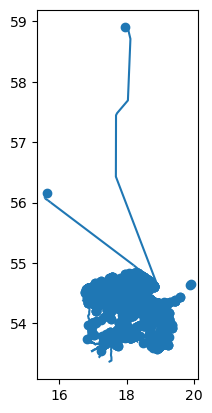

In [10]:
routes = ["bus", "ferry", "railway", "subway", "train", "tram", "trolleybus"]
rails = ["tramway", "light_rail", "rail", "subway", "tram"]
bus = ['yes']
transit = osm.get_data_by_custom_criteria(custom_filter={
                                        'route': routes,
                                        'public_transport': True},
                                        # Keep data matching the criteria above
                                        filter_type="keep",
                                        # Do not keep nodes (point data)    
                                        keep_nodes=True, 
                                        keep_ways=True, 
                                        keep_relations=True)
transit.plot()


In [11]:
transit.head(2)

,changeset,tags,lon,timestamp,lat,version,id,bus,ferry,foot,...,website,public_transport,geometry,osm_type,bicycle,duration,from,route,to,type
0,0.0,"{""crossing"":""marked"",""highway"":""crossing""}",18.608545,1662522272,54.302116,9,26378721,None,None,None,...,None,stop_position,POINT (18.60855 54.30212),node,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,"{""highway"":""bus_stop""}",18.184341,1643573705,54.128380,6,26457232,yes,None,None,...,None,platform,POINT (18.18434 54.12838),node,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
len(transit[~transit['train'].isna()])

413

In [15]:
trains = transit[~transit['train'].isna()]

In [16]:
trains.head(2)

,changeset,tags,lon,timestamp,lat,version,id,bus,ferry,foot,...,website,public_transport,geometry,osm_type,bicycle,duration,from,route,to,type
7,0.0,"{""wikidata"":""Q11817109"",""wikipedia"":""pl:Pinczy...",18.348333,1661602953,53.962234,14,30113663,None,None,None,...,None,station,POINT (18.34833 53.96223),node,NaN,NaN,NaN,NaN,NaN,NaN
8,0.0,"{""wikidata"":""Q2203698"",""wikipedia"":""pl:Rokitki...",18.736906,1659521836,54.080872,15,30113726,None,None,None,...,None,station,POINT (18.73691 54.08087),node,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
trains.iloc[0]

changeset                                                         0.0
tags                {"wikidata":"Q11817109","wikipedia":"pl:Pinczy...
lon                                                         18.348333
timestamp                                                  1661602953
lat                                                         53.962234
version                                                            14
id                                                           30113663
bus                                                              None
ferry                                                            None
foot                                                             None
network                                                          None
railway                                                          halt
train                                                             yes
tram                                                             None
trolleybus          

<AxesSubplot: >

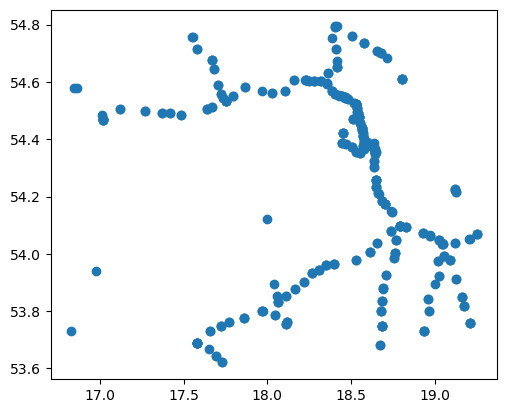

In [18]:
trains.plot()